Using TensorFlow backend.


(18505, 9)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
____________

10000/10000 [==============================] - 0s 21us/step - loss: 0.0029 - mean_absolute_error: 0.0343 - r2: 0.9686
Epoch 101/200
10000/10000 [==============================] - 0s 20us/step - loss: 0.0029 - mean_absolute_error: 0.0345 - r2: 0.9688
Epoch 102/200
10000/10000 [==============================] - 0s 20us/step - loss: 0.0030 - mean_absolute_error: 0.0346 - r2: 0.9672
Epoch 103/200
10000/10000 [==============================] - 0s 21us/step - loss: 0.0031 - mean_absolute_error: 0.0357 - r2: 0.9663
Epoch 104/200
10000/10000 [==============================] - 0s 18us/step - loss: 0.0028 - mean_absolute_error: 0.0341 - r2: 0.9690
Epoch 105/200
10000/10000 [==============================] - 0s 19us/step - loss: 0.0029 - mean_absolute_error: 0.0338 - r2: 0.9686
Epoch 106/200
10000/10000 [==============================] - 0s 19us/step - loss: 0.0027 - mean_absolute_error: 0.0332 - r2: 0.9699
Epoch 107/200
10000/10000 [==============================] - 0s 18us/step - loss: 0.0029 -

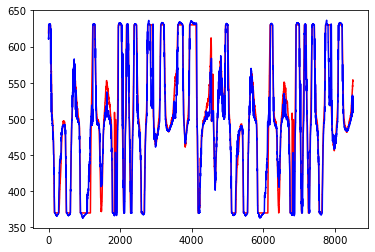

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import keras.backend as K

def r2(y_true, y_pred):
    a = K.square(y_pred - y_true)
    b = K.sum(a)
    c = K.mean(y_true)
    d = K.square(y_true - c)
    e = K.sum(d)
    f = 1 - b/e
    return f



all_data = pd.read_csv('C:/Users/Chinese/Desktop/MODEL/Data.csv',encoding='gbk',header=None)
all_data=all_data.iloc[1:,0:]

print(all_data.shape)
x_data = all_data.iloc[:,0:8].values
y_data = all_data.iloc[:,8].values

# 
sc = MinMaxScaler(feature_range=(0, 1))

x_data = sc.fit_transform(x_data)
y_data = sc.fit_transform(y_data.reshape(-1,1))


x_train = x_data[0:10000]
y_train = y_data[0:10000]

# x_valid = x_data[8000:10000]
# y_valid = x_data[8000:10000]

x_test = x_data[10000:19000]
y_test = y_data[10000:19000]

model=keras.Sequential()
model.add(layers.Dense(64,input_dim=8))
model.add(Activation('relu'))#relu #softmax
model.add(keras.layers.Dropout(0.2))
model.add(layers.Dense(16,input_dim=64))
model.add(Activation('relu'))#relu #softmax
model.add(keras.layers.Dropout(0.2))
model.add(layers.Dense(8,input_dim=16))
model.add(Activation('relu'))#relu #softmax
model.add(layers.Dense(1,input_dim=8))
# model.add(Activation('relu'))#relu #softmax
# model.add(layers.Dense(1,input_dim=4))
print(model.summary())
model.compile(optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae',r2]
)

model.fit(x_train,y_train,epochs=200,batch_size=50,verbose=1)
model.save('C:/Users/Chinese/Desktop/MODEL/model.h5', overwrite=True, include_optimizer=True)

y_pred=model.predict(x_test)

y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test)
plt.plot(y_test, c='red', label='actual')
plt.plot(y_pred, c='blue', label='predict')
plt.show()



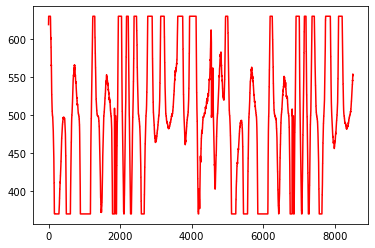

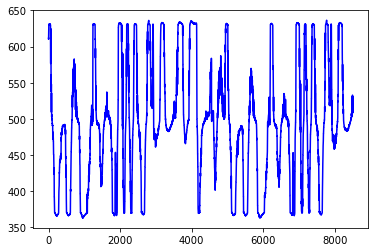

In [2]:
plt.plot(y_test, c='red', label='actual')
plt.show()
plt.plot(y_pred, c='blue', label='predict')
plt.show()